# Tools for Data Science - Final Project
# Title: Exploring the Market of Laptops through Pricing and Performance Testing

## My Data

*First Name: Isaac*

*Last Name: Sluder*

*E-mail: iws4@uakron.edu*

*UID: 4632256*


## Background and Motivation
Discuss your motivations and reasons for choosing this project, especially any background or research interests that may have influenced your decision.

Laptops have always been a huge interest to me personally. I have a lot of friends who are desktop people. I am not, I prefer portability over performance. I stumbled upon this dataset when viewing open datasets published on [Kaggle](https://www.kaggle.com/)–which is a data science website. Immediately I was attracted to the prospects of learning and gaining insight on the pricing and the performace of laptops. 

## Project Objectives
Provide the primary questions you are trying to answer in your project. What would you like to learn and accomplish? List the benefits.

The primary questions I am trying to answer are:
1. What are the major catagories that influence the pricing of laptops?
2. How is pricing related to components?
3. How is rating related to pricing?
4. Is there a correlation between performance and pricing, and how do we get performace metrics?

## Data
From where and how are you collecting your data? If appropriate, provide a link to your data sources.

The primary data is coming from [Laptop Dataset (2024)](https://www.kaggle.com/datasets/aniket1505/laptop-dataset-2023/data),
the secondary source is still developing. To avoid collecting performance data by hand, there is a need to come up with a webscraping api to gather information from a computer performance website.
The computer performance website to be scraped is [Geekbench](https://www.geekbench.com/).
The reasoning behind this, is is one of the most popular performance benching websites that includes metrics that can be compared accross different computer operating systems. Which is one hurdle of the dataset.

Current plan to scrap the web is to use [yafethtb](https://github.com/yafethtb/Geekbench-Web-Scraping-Project) web parsing functions. I've already started to demo the functions in the `GeekBench_parsing.py` file. Though parsing Geekbench may take some time.

Below is a start to the importing of the data set containing the laptops.

### Imports

In [2]:
# ! pip install forex-python    #Run this line if forex-python is not installed

In [78]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
sns.set_theme()
from forex_python.converter import CurrencyRates

#Machine Learning stuff
import statsmodels.formula.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.neural_network import MLPClassifier, MLPRegressor


#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

Read in both Dataframes. `laptops.csv` was obtained from kaggle. `geekbench_data.csv` was parsed from the internet. 

In [4]:
df = pd.read_csv('laptops.csv')
print(df.head(5))

   index   brand                                              Model  Price  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580   

   Rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2            4           8   
1      67           intel        core i7          4            8          16   
2      73             amd        ryzen 5          6           12           8   
3      62           intel        core i5         12           16           8   
4      62             amd        ryzen 3          4            8           8   

   ... secondary_storage_type  secondary_storage_c

Info about the Dataframe.

In [5]:
print(set(df['brand']))
print(df.groupby('OS')['OS'].count())
print(f"Ratings min: {df['Rating'].min()}, max: {df['Rating'].max()}")
print(set(df['processor_tier']))

{'gigabyte', 'lg', 'axl', 'primebook', 'hp', 'microsoft', 'iball', 'walker', 'avita', 'realme', 'jio', 'fujitsu', 'zebronics', 'wings', 'tecno', 'chuwi', 'acer', 'apple', 'samsung', 'dell', 'msi', 'asus', 'ultimus', 'honor', 'infinix', 'lenovo'}
OS
android      1
chrome      16
dos         32
mac         15
other        2
ubuntu       1
windows    924
Name: OS, dtype: int64
Ratings min: 24, max: 89
{'core i7', 'ryzen 3', 'm1', 'pentium', 'core i9', 'ryzen 7', 'other', 'celeron', 'm2', 'core ultra 7', 'core i3', 'ryzen 9', 'ryzen 5', 'core i5', 'm3'}


In [6]:
df.describe()

index          Price      Rating   num_cores  num_threads  \
count   991.000000     991.000000  991.000000  991.000000   991.000000   
mean    505.860747   77266.504541   63.931382    8.128153    12.191726   
std     287.899458   57384.910269   10.190575    4.215499     5.585115   
min       1.000000    9800.000000   24.000000    2.000000     0.000000   
25%     258.500000   43595.000000   58.000000    6.000000     8.000000   
50%     507.000000   61900.000000   64.000000    8.000000    12.000000   
75%     754.500000   89245.000000   71.000000   10.000000    16.000000   
max    1002.000000  454490.000000   89.000000   24.000000    32.000000   

       ram_memory  primary_storage_capacity  secondary_storage_capacity  \
count  991.000000                991.000000                  991.000000   
mean    13.047427                610.938446                    4.004036   
std      5.591188                266.927666                   33.553936   
min      2.000000                 32.000000                    0.000000   
25%      8.000000                512.000000                    0.000000   
50%     16.000000                512.000000                    0.000000   
75%     16.000000                512.000000                    0.000000   
max     36.000000               2048.000000                  512.000000   

       display_size  resolution_width  resolution_height  
count    991.000000        991.000000         991.000000  
mean      15.171241       2003.503532        1181.227043  
std        0.938089        361.965292         263.884019  
min       10.100000       1080.000000         768.000000  
25%       14.000000       1920.000000        1080.000000  
50%       15.600000       1920.000000        1080.000000  
75%       15.600000       1920.000000        1200.000000  
max       18.000000       3840.000000        2560.000000

Note: the price is in rupees, will have to convert, using forex_python.converter to get the current rate.

## Ethical considerations
Complete a stakeholder analysis for your project.

The topic of this project has most to do with Laptops, which in my opinion seems to be a lighter topic or less examined one in the world of ethics. But I would have to imagine that if the results were published, it is possible that they may sway opinions of those purchasing laptops. And one must consider if this is wrong or right. I would argue it is our best interest to be examining the relationship between cost and performace and see how much is influenced by the "Name" of the company. Learning what the best bang for your buck could be helpful at the very least. This topic could be further explored in Ethics and Data Science.



## Data Processing
Do you expect to do substantial data cleanup or data extraction? What quantities do you plan to derive from your data? How will data processing be implemented?

From early examination, it does not seem like a ton of data cleanup for the Laptop dataset will be need. The cleanup is going to come in when extracting data from the website for the performance dataset. Some intial thoughts on the data cleansing would be to tranfer the price from Rupees to USD. We can do that with the forex-python library. 

In [7]:
c = CurrencyRates()
rate = c.get_rate('INR', 'USD')
# rate = 0.012          #If for some reason, CurrencyRates() does not work, comment the above lines, and initiate this rate.
df['Price'] = df['Price'] * rate
df.describe()

index        Price      Rating   num_cores  num_threads  \
count   991.000000   991.000000  991.000000  991.000000   991.000000   
mean    505.860747   930.847794   63.931382    8.128153    12.191726   
std     287.899458   691.329541   10.190575    4.215499     5.585115   
min       1.000000   118.062910   24.000000    2.000000     0.000000   
25%     258.500000   525.199241   58.000000    6.000000     8.000000   
50%     507.000000   745.723891   64.000000    8.000000    12.000000   
75%     754.500000  1075.155552   71.000000   10.000000    16.000000   
max    1002.000000  5475.348165   89.000000   24.000000    32.000000   

       ram_memory  primary_storage_capacity  secondary_storage_capacity  \
count  991.000000                991.000000                  991.000000   
mean    13.047427                610.938446                    4.004036   
std      5.591188                266.927666                   33.553936   
min      2.000000                 32.000000                    0.000000   
25%      8.000000                512.000000                    0.000000   
50%     16.000000                512.000000                    0.000000   
75%     16.000000                512.000000                    0.000000   
max     36.000000               2048.000000                  512.000000   

       display_size  resolution_width  resolution_height  
count    991.000000        991.000000         991.000000  
mean      15.171241       2003.503532        1181.227043  
std        0.938089        361.965292         263.884019  
min       10.100000       1080.000000         768.000000  
25%       14.000000       1920.000000        1080.000000  
50%       15.600000       1920.000000        1080.000000  
75%       15.600000       1920.000000        1200.000000  
max       18.000000       3840.000000        2560.000000

For the geekbench scraped data, some sample data has been collected. First a quarry was needed to be made. This is done in the next cell. The geekbench data provides benchmarked scores for the cpu performance of all kinds of computers. Our aim is for us to obtain results of laptop performance so a quarry must be made to obtain those results. 

In [8]:
full_quarry = []
for model in df['Model']:
        details = model.split(" ")
        brand = details[0]
        count = 0
        for det in details:
        
            if det.startswith("("):
                st_placement = count
            if det.endswith("/"):
                et_placement = count
                break
            if det == 'Laptop':
                Lp_placement = count
            count += 1

        #Apple requires some special attention. Though it is possible apple may be discarded later becuase the data set size for apple is only 15 laptops.
        if brand == 'Apple':
            quarry = []
            quarry.append(brand)
            for det in details[1:Lp_placement]:
                if det == 'MGND3HN':
                    pass
                else:
                    quarry.append(det)
            for det in details[st_placement:et_placement+1]:
                quarry.append(det.strip("()/"))
            name = ""
            for det in quarry:
                name += str(det) + " "
            
            full_quarry.append(name)
        else:
            quarry = []
            quarry.append(brand)
            for det in details[st_placement:et_placement+1]:
                quarry.append(det.strip("()/"))
            
            name =""
            for det in quarry:
                name += str(det) + " "
            
            full_quarry.append(name)
        
        
for name in full_quarry:

    print(name)

Tecno 11th Gen Core i3 
Tecno 11th Gen Core i7 
HP AMD Ryzen 5 5600H 
Acer 12th Gen Core i5 
Lenovo AMD Ryzen 3 5300U 
Apple MacBook Air 2020 Apple M1 
Infinix 11th Gen Core i5 
Asus 11th Gen Core i5 
HP 12th Gen Core i3 
Infinix 13th Gen Core i9 
Dell 12th Gen Core i3 
Samsung 12th Gen Core i5 
MSI 12th Gen Core i5 
Asus Ryzen 7-5800H 
Lenovo 11th Gen Core i5 
HP 14th Gen Core i7 
Lenovo 12th Gen Core i7 
Asus 11th Gen Core i7 
HP AMD Ryzen 5 7535HS 
Wings 11th Gen Core i5 
HP AMD Athlon Silver-3050U 
Lenovo AMD Ryzen 3 7320U 
Apple MacBook Pro 16 2023 Apple M3 Max 
Asus 12th Gen Core i3 
Asus 11th Gen Core i3 
Acer 13th Gen Core i5 
HP AMD Ryzen 7 7840HS 
Ultimus 10th Gen Core i5  
HP 13th Gen Core i5 
MSI 11th Gen Core i7 
Samsung 12th Gen Core i5 
Samsung 12th Gen Core i5 
Lenovo 11th Gen Core i5 
Asus Ryzen 5-5600H 
Apple MacBook Air 2022 Apple M2 
Dell 12th Gen Core i5 
Acer 12th Gen Core i5 
Acer 12th Gen Core i3 
HP 12th Gen Core i5 
Asus 12th Gen Core i5 
Asus AMD Ryzen 9 6900

This is what the web addresses were then constructed with. The challenge with automating the quarry is that to obtain a generalizability of the data set, simplifying the quarry was necessary but also keeping enough detail to differentiate the scores. 

In [9]:
print(len(full_quarry))
print(len(set(full_quarry)))

991
274


Our quarry generalizes the search for 274 CPUs. After developing the quarry a few columns were added to help track which quarry was associated with which cpu/laptop. We will import that here overtop df since it replaces that dataset.

In [10]:
df = pd.read_csv('laptops_quarry.csv', index_col=0)
df.head()

index   brand                                              Model  Price  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  35990   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  51100   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  39990   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  28580   

   Rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2            4           8   
1      67           intel        core i7          4            8          16   
2      73             amd        ryzen 5          6           12           8   
3      62           intel        core i5         12           16           8   
4      62             amd        ryzen 3          4            8           8   

   ...    gpu_type  is_touch_screen display_size  resolution_width  \
0  ...  integrated            False         15.6              1920   
1  ...  integrated            False         15.6              1920   
2  ...   dedicated            False         15.6              1920   
3  ...  integrated            False         14.0              1920   
4  ...  integrated            False         15.6              1920   

  resolution_height       OS  year_of_warranty                     quarry  \
0              1080  windows                 1    Tecno 11th Gen Core i3    
1              1080  windows                 1    Tecno 11th Gen Core i7    
2              1080  windows                 1      HP AMD Ryzen 5 5600H    
3              1080  windows                 1     Acer 12th Gen Core i5    
4              1080  windows                 1  Lenovo AMD Ryzen 3 5300U    

                                         urls_quarry  num_pages  
0  https://browser.geekbench.com/search?q=Tecno+1...          0  
1  https://browser.geekbench.com/search?q=Tecno+1...          0  
2  https://browser.geekbench.com/search?q=HP+AMD+...        112  
3  https://browser.geekbench.com/search?q=Acer+12...          4  
4  https://browser.geekbench.com/search?q=Lenovo+...         20  

[5 rows x 25 columns]

Note above the quarry has 3 new columns, quarry, urls_quarry, and num_pages. If num_pages = 0, then the quarry was a failure and we will have to disregard that CPU or find another way to fill in the gaps.

In [11]:
count = 0
for num in df['num_pages']:
    if num > 0:
        count +=1
        
print(f"This scraping method accounts for {count} of {len(df['num_pages'])} \nlaptops yielding {(count/len(df['num_pages']))*100:.3f}% scraping success. ")

This scraping method accounts for 792 of 991 
laptops yielding 79.919% scraping success. 


But as shown above, we retain most of the data. Next we can import the data that was quarried. Details of how this quarry was done, can be found in 'prototyping_parser.ipynb'. I plan to combine this into a single python script, I want to run a greater quarry later to see if that will effect the data we will recieve.

In [12]:
df_p = pd.read_csv('geekbench_data.csv', index_col=0)
df_p.head()

CPU Name Platform Name  Single-core Score  \
0      AMD Ryzen 7 7840HS 3801 MHz (8 cores)       Windows               2116   
1  AMD Ryzen 7 PRO 7840HS 3801 MHz (8 cores)       Windows               2311   
2      AMD Ryzen 7 7840HS 3801 MHz (8 cores)       Windows               2576   
3      AMD Ryzen 7 7840HS 3801 MHz (8 cores)       Windows               2414   
4      AMD Ryzen 7 7840HS 3801 MHz (8 cores)       Windows               2524   

   Multi-core Score                                             quarry  
0             10129  https://browser.geekbench.com/search?q=HP+AMD+...  
1             11656  https://browser.geekbench.com/search?q=HP+AMD+...  
2             12662  https://browser.geekbench.com/search?q=HP+AMD+...  
3             10761  https://browser.geekbench.com/search?q=HP+AMD+...  
4             12349  https://browser.geekbench.com/search?q=HP+AMD+...

In [13]:
df_p.describe()

Single-core Score  Multi-core Score
count       28931.000000      28931.000000
mean         1816.219833       7527.202482
std           633.073422       4097.553640
min            94.000000        147.000000
25%          1385.500000       4640.000000
50%          1870.000000       6973.000000
75%          2273.500000       9754.000000
max          3283.000000      21725.000000

As you can see, the range is quite large, and the standard deviation is a large gap. Lets see how many duplicates there are:

([], [])

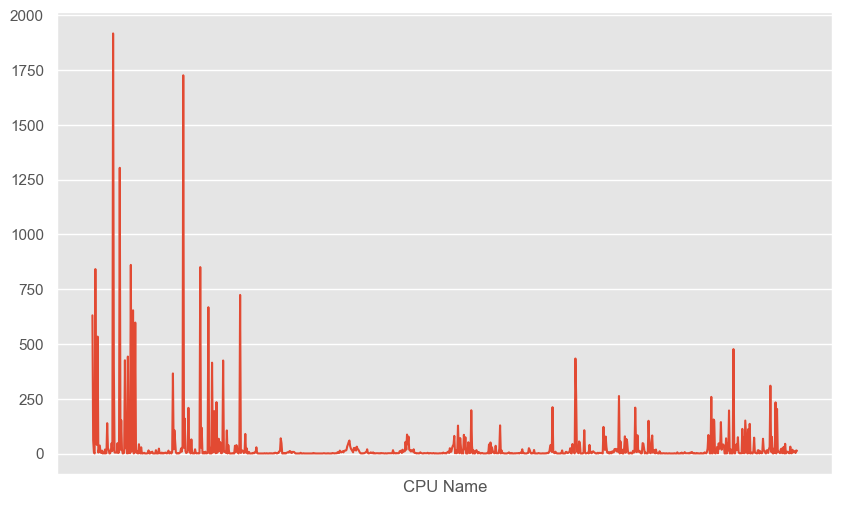

In [14]:
df_cpu_group = df_p.groupby('CPU Name')['Platform Name'].count()
df_cpu_group.plot()
plt.xticks([])

There are definitely a lot of duplicates. If the standard deviation of the dataset is ok, we can average all of them. Note there is no order to the above graph.

Text(0, 0.5, 'Standard Deviation')

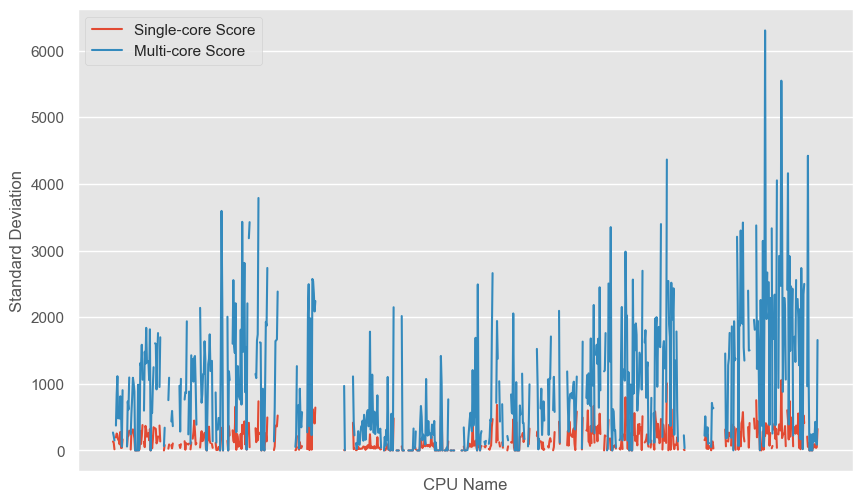

In [15]:
df_cpu_group = df_p.groupby('CPU Name')[['Single-core Score', 'Multi-core Score']].std()
df_cpu_group.plot()
plt.xticks([])
plt.ylabel('Standard Deviation')

From this point we can tell that the standard deviation tells us for multi-core score, there is a wide range of values. Which means our cpu quarry is too generalizable. If we can find a way to correlate the laptop dataset better to each cpu description that will be best. For now we will continue, but this will be something we come back to, and we can acknowledge this is a weakness in the study.

In [16]:
# Relate is used to "relate" the two dataframes into one.
relate = dict(df_p.groupby('quarry')[['Single-core Score', 'Multi-core Score']].mean())
relate['Single-core Score'].keys()

Index(['https://browser.geekbench.com/search?q=ASUS+AMD+Ryzen+9+7940HS++',
       'https://browser.geekbench.com/search?q=Acer++Intel+Celeron+N4500+',
       'https://browser.geekbench.com/search?q=Acer+11th+Gen+Core+i5+',
       'https://browser.geekbench.com/search?q=Acer+11th+Gen+Core+i5++',
       'https://browser.geekbench.com/search?q=Acer+12th+Gen+Core+i3+',
       'https://browser.geekbench.com/search?q=Acer+12th+Gen+Core+i5+',
       'https://browser.geekbench.com/search?q=Acer+12th+Gen+Core+i7+',
       'https://browser.geekbench.com/search?q=Acer+13th+Gen+Core+i3+',
       'https://browser.geekbench.com/search?q=Acer+13th+Gen+Core+i5+',
       'https://browser.geekbench.com/search?q=Acer+13th+Gen+Core+i7+',
       ...
       'https://browser.geekbench.com/search?q=Lenovo+Ryzen+7+5800H+',
       'https://browser.geekbench.com/search?q=MSI+13th+Gen+Core+i7+',
       'https://browser.geekbench.com/search?q=MSI+AMD+Ryzen+7++',
       'https://browser.geekbench.com/search?q=Micro

Now that we have retrieved the Scores and placed them in a dictionary, we can easily use apply to create new columns with those scores.

In [17]:
count = 0
sc_array = []
for i in df['urls_quarry']:
    if i in set(relate['Single-core Score'].keys()):
        sc_array.append(relate['Single-core Score'][i])
        count += 1
    else:
        sc_array.append(np.NaN)
print(count)

count = 0
mc_array = []
for i in df['urls_quarry']:
    if i in set(relate['Multi-core Score'].keys()):
        mc_array.append(relate['Multi-core Score'][i])
        count += 1
    else:
        mc_array.append(np.NaN)
print(count)

792
792


Apply single_core_score and multi_core_score functions to respective columns

In [18]:
df['Single-core Score'] = sc_array
df['Multi-core Score'] = mc_array

# Also I need to re-apply the price
c = CurrencyRates()
rate = c.get_rate('INR', 'USD')
# rate = 0.012          #Same as before, if for some reason CurrencyRates() does not work, comment the above lines, and initiate this rate.
df['Price'] = df['Price'] * rate

In [19]:
df

index   brand                                              Model  \
0        1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...   
1        2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...   
2        3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...   
3        4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...   
4        5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...   
..     ...     ...                                                ...   
986    998    asus  Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...   
987    999     msi  MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...   
988   1000    asus  Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...   
989   1001    asus  Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...   
990   1002      hp  HP Chromebook 15a-na0008TU Laptop (Intel Celer...   

           Price  Rating processor_brand processor_tier  num_cores  \
0     289.013185      63           intel        core i3          2   
1     433.580014      67           intel        core i7          4   
2     615.613746      73             amd        ryzen 5          6   
3     481.768957      62           intel        core i5         12   
4     344.309997      62             amd        ryzen 3          4   
..           ...     ...             ...            ...        ...   
986   794.997086      68             amd        ryzen 5          6   
987  1108.225214      73           intel        core i7         10   
988   542.005135      59             amd        ryzen 5          4   
989   819.091557      68             amd        ryzen 5          6   
990   252.871478      37           intel        celeron          2   

     num_threads  ram_memory  ... display_size  resolution_width  \
0              4           8  ...         15.6              1920   
1              8          16  ...         15.6              1920   
2             12           8  ...         15.6              1920   
3             16           8  ...         14.0              1920   
4              8           8  ...         15.6              1920   
..           ...         ...  ...          ...               ...   
986           12          16  ...         15.6              1920   
987           16          16  ...         15.6              1920   
988            8           8  ...         15.6              1920   
989           12          16  ...         14.0              2560   
990            2           4  ...         15.6              1366   

    resolution_height       OS year_of_warranty                     quarry  \
0                1080  windows                1    Tecno 11th Gen Core i3    
1                1080  windows                1    Tecno 11th Gen Core i7    
2                1080  windows                1      HP AMD Ryzen 5 5600H    
3                1080  windows                1     Acer 12th Gen Core i5    
4                1080  windows                1  Lenovo AMD Ryzen 3 5300U    
..                ...      ...              ...                        ...   
986              1080  windows                1        Asus Ryzen 5 5600H    
987              1080  windows                2      MSI 12th Gen Core i7    
988              1080  windows                1       Asus Ryzen 5 7520U     
989              1600  windows                1        Asus Ryzen 5 7530U    
990               768   chrome                1    HP Intel Celeron N4500    

                                           urls_quarry  num_pages  \
0    https://browser.geekbench.com/search?q=Tecno+1...          0   
1    https://browser.geekbench.com/search?q=Tecno+1...          0   
2    https://browser.geekbench.com/search?q=HP+AMD+...        112   
3    https://browser.geekbench.com/search?q=Acer+12...          4   
4    https://browser.geekbench.com/search?q=Lenovo+...         20   
..                                                 ...        ...   
986  https://browser.geekbench.com/search?q=Asus+R

Lastly we will have to drop all the Nan values for the dataframe.

In [20]:
df = df.dropna()
df

index    brand                                              Model  \
2        3       hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...   
3        4     acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...   
4        5   lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...   
5        6    apple  Apple MacBook Air 2020 MGND3HN Laptop (Apple M...   
6        7  infinix  Infinix INBook Y2 Plus Laptop (11th Gen Core i...   
..     ...      ...                                                ...   
981    993      msi  MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...   
985    997     acer  Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...   
986    998     asus  Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...   
988   1000     asus  Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...   
990   1002       hp  HP Chromebook 15a-na0008TU Laptop (Intel Celer...   

           Price  Rating processor_brand processor_tier  num_cores  \
2     615.613746      73             amd        ryzen 5          6   
3     481.768957      62           intel        core i5         12   
4     344.309997      62             amd        ryzen 3          4   
5     855.233264      45           apple             m1          8   
6     421.532778      56           intel        core i5          4   
..           ...     ...             ...            ...        ...   
981  1445.547815      76           intel        core i7         10   
985   909.566297      67             amd        ryzen 7          8   
986   794.997086      68             amd        ryzen 5          6   
988   542.005135      59             amd        ryzen 5          4   
990   252.871478      37           intel        celeron          2   

     num_threads  ram_memory  ... display_size  resolution_width  \
2             12           8  ...         15.6              1920   
3             16           8  ...         14.0              1920   
4              8           8  ...         15.6              1920   
5              8           8  ...         13.3              2560   
6              8          16  ...         15.6              1920   
..           ...         ...  ...          ...               ...   
981           16          16  ...         15.6              1920   
985           16           8  ...         15.6              1920   
986           12          16  ...         15.6              1920   
988            8           8  ...         15.6              1920   
990            2           4  ...         15.6              1366   

    resolution_height       OS year_of_warranty  \
2                1080  windows                1   
3                1080  windows                1   
4                1080  windows                1   
5                1600      mac                1   
6                1080  windows                1   
..                ...      ...              ...   
981              1080  windows                2   
985              1080  windows                1   
986              1080  windows                1   
988              1080  windows                1   
990               768   chrome                1   

                               quarry  \
2               HP AMD Ryzen 5 5600H    
3              Acer 12th Gen Core i5    
4           Lenovo AMD Ryzen 3 5300U    
5    Apple MacBook Air 2020 Apple M1    
6           Infinix 11th Gen Core i5    
..                                ...   
981             MSI 13th Gen Core i7    
985          Acer AMD Ryzen 7 7735HS    
986               Asus Ryzen 5 5600H    
988              Asus Ryzen 5 7520U     
990           HP Intel Celeron N4500    

                                           urls_quarry  num_pages  \
2    https://browser.geekbench.com/search?q=HP+AMD+...        112   
3    https://browser.geekbench.com/search?q=Acer+12...          4   
4    https://browser.geekbench.com/search?q=Lenovo+...         20   
5    https://browser.geekbench.com/search?q=Apple+M...       1197   
6    ht

Still got 792 rows! Pretty good retention.

## Exploratory Analysis
Which methods and visualizations are you planning to use to look at your dataset?

When the data sets are combined (laptop and performance datasets), I would like to start off with a correlation matrix for the numerical values. Then plot various relationships that seem interesting to me. Then I would like to get at what I am aiming to anayze, performance and price, and look to see if there are any other relationships related to performance that make sense to look at.

In [21]:
df.describe()

index        Price      Rating   num_cores  num_threads  \
count   792.000000   792.000000  792.000000  792.000000   792.000000   
mean    508.885101   977.363531   64.213384    8.594697    12.694444   
std     283.587583   703.567733    9.890867    4.131972     5.425050   
min       3.000000   180.588064   35.000000    2.000000     2.000000   
25%     271.750000   560.075989   58.000000    6.000000     8.000000   
50%     507.500000   770.902614   64.000000    8.000000    12.000000   
75%     760.250000  1120.874812   71.000000   10.000000    16.000000   
max    1002.000000  5475.348165   89.000000   24.000000    32.000000   

       ram_memory  primary_storage_capacity  secondary_storage_capacity  \
count  792.000000                792.000000                  792.000000   
mean    13.252525                609.818182                    1.131313   
std      5.682441                255.068960                   20.825272   
min      4.000000                 32.000000                    0.000000   
25%      8.000000                512.000000                    0.000000   
50%     16.000000                512.000000                    0.000000   
75%     16.000000                512.000000                    0.000000   
max     36.000000               2048.000000                  512.000000   

       display_size  resolution_width  resolution_height    num_pages  \
count    792.000000        792.000000         792.000000   792.000000   
mean      15.205808       2023.305556        1193.747475    31.878788   
std        0.918178        378.573592         273.280834    96.168497   
min       10.100000       1080.000000         768.000000     1.000000   
25%       14.000000       1920.000000        1080.000000     4.000000   
50%       15.600000       1920.000000        1080.000000    13.500000   
75%       15.600000       1920.000000        1200.000000    22.250000   
max       18.000000       3840.000000        2560.000000  1351.000000   

       Single-core Score  Multi-core Score  
count         792.000000        792.000000  
mean         1890.154499       7555.251427  
std           516.421784       3360.230557  
min           287.000000        442.000000  
25%          1682.496000       5183.596000  
50%          1958.956000       7176.508000  
75%          2270.340000      10043.976000  
max          3118.928000      20243.800000

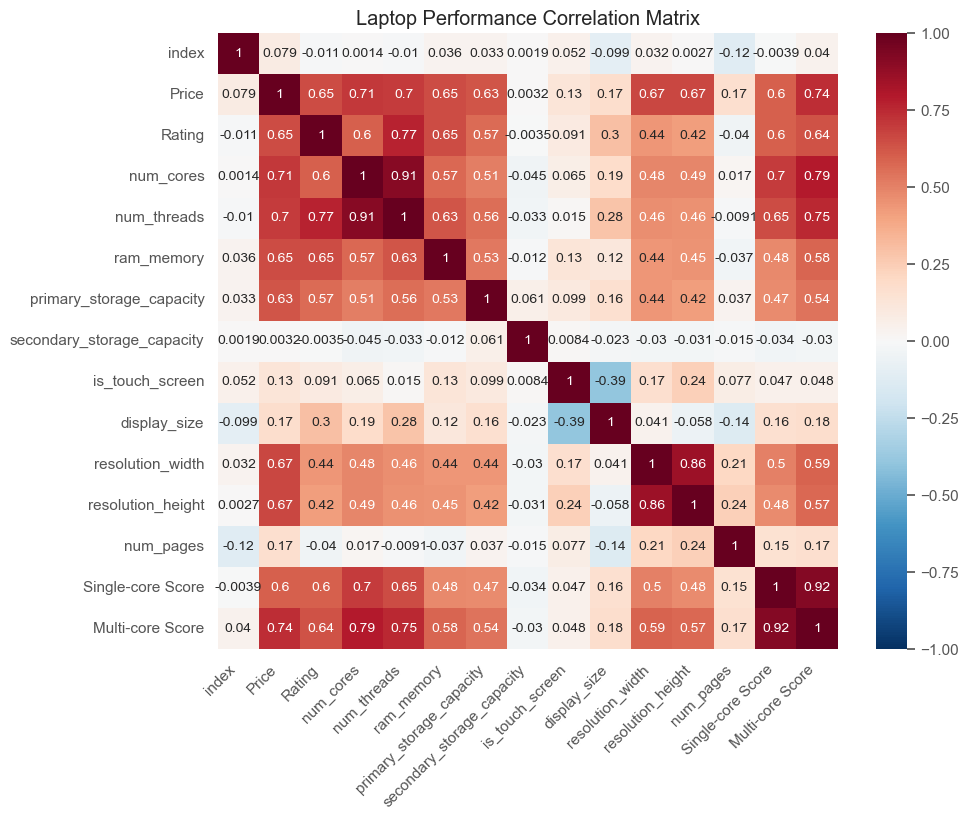

In [22]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Laptop Performance Correlation Matrix')

plt.show()

Some very interesting things to note from this correlation matrix. There are a few obvious ones, like resolution_width and resolution height are highly correlated. Also the number of threads and the number of cores are also highly correlated - but this is also generally true. An interesting negative correlation is that display size and if the the screen is a touch screen are negatively correlated. This is typically true because the larger the screen the more expensive it is to have the screen with touch capabilities. One I would like to point out is that secondary storage capacity seems to have no impact, so I will remove it. Also the number of pages quarried, has little to no impact. Originally I thought this may correlate to the popularity of the laptops but I do not think it will have much impact.

In [23]:
df = df.drop(columns=['secondary_storage_capacity', 'num_pages', 'index'])

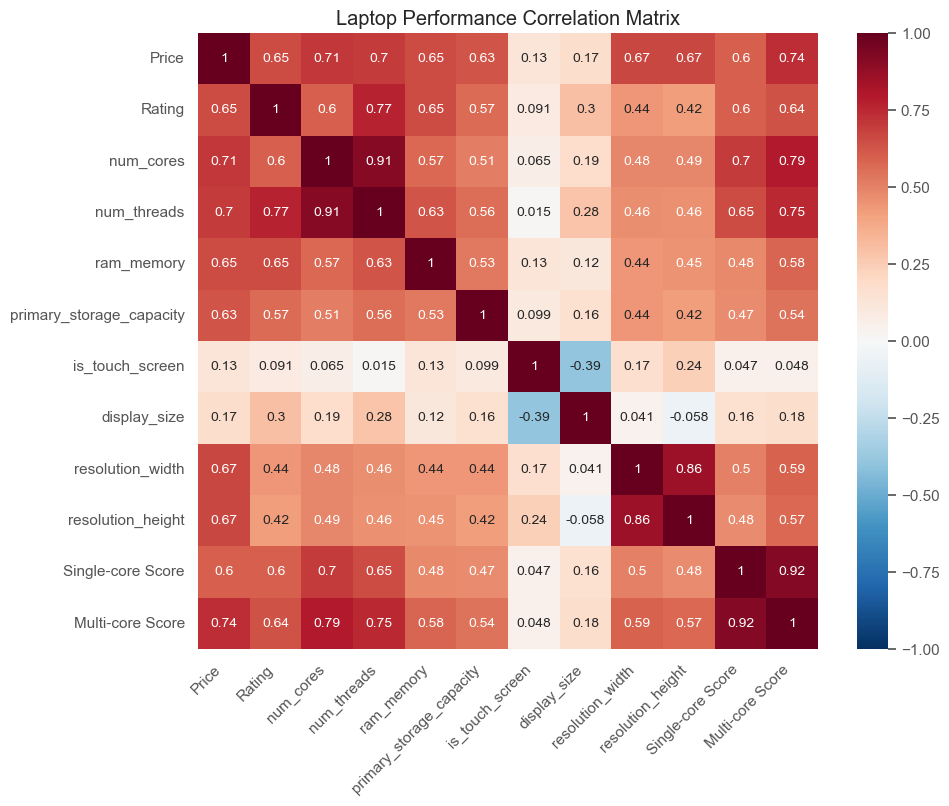

In [24]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Laptop Performance Correlation Matrix')

plt.show()

Other than that everything else seems to range well. It'll be interesting to continue analysis.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


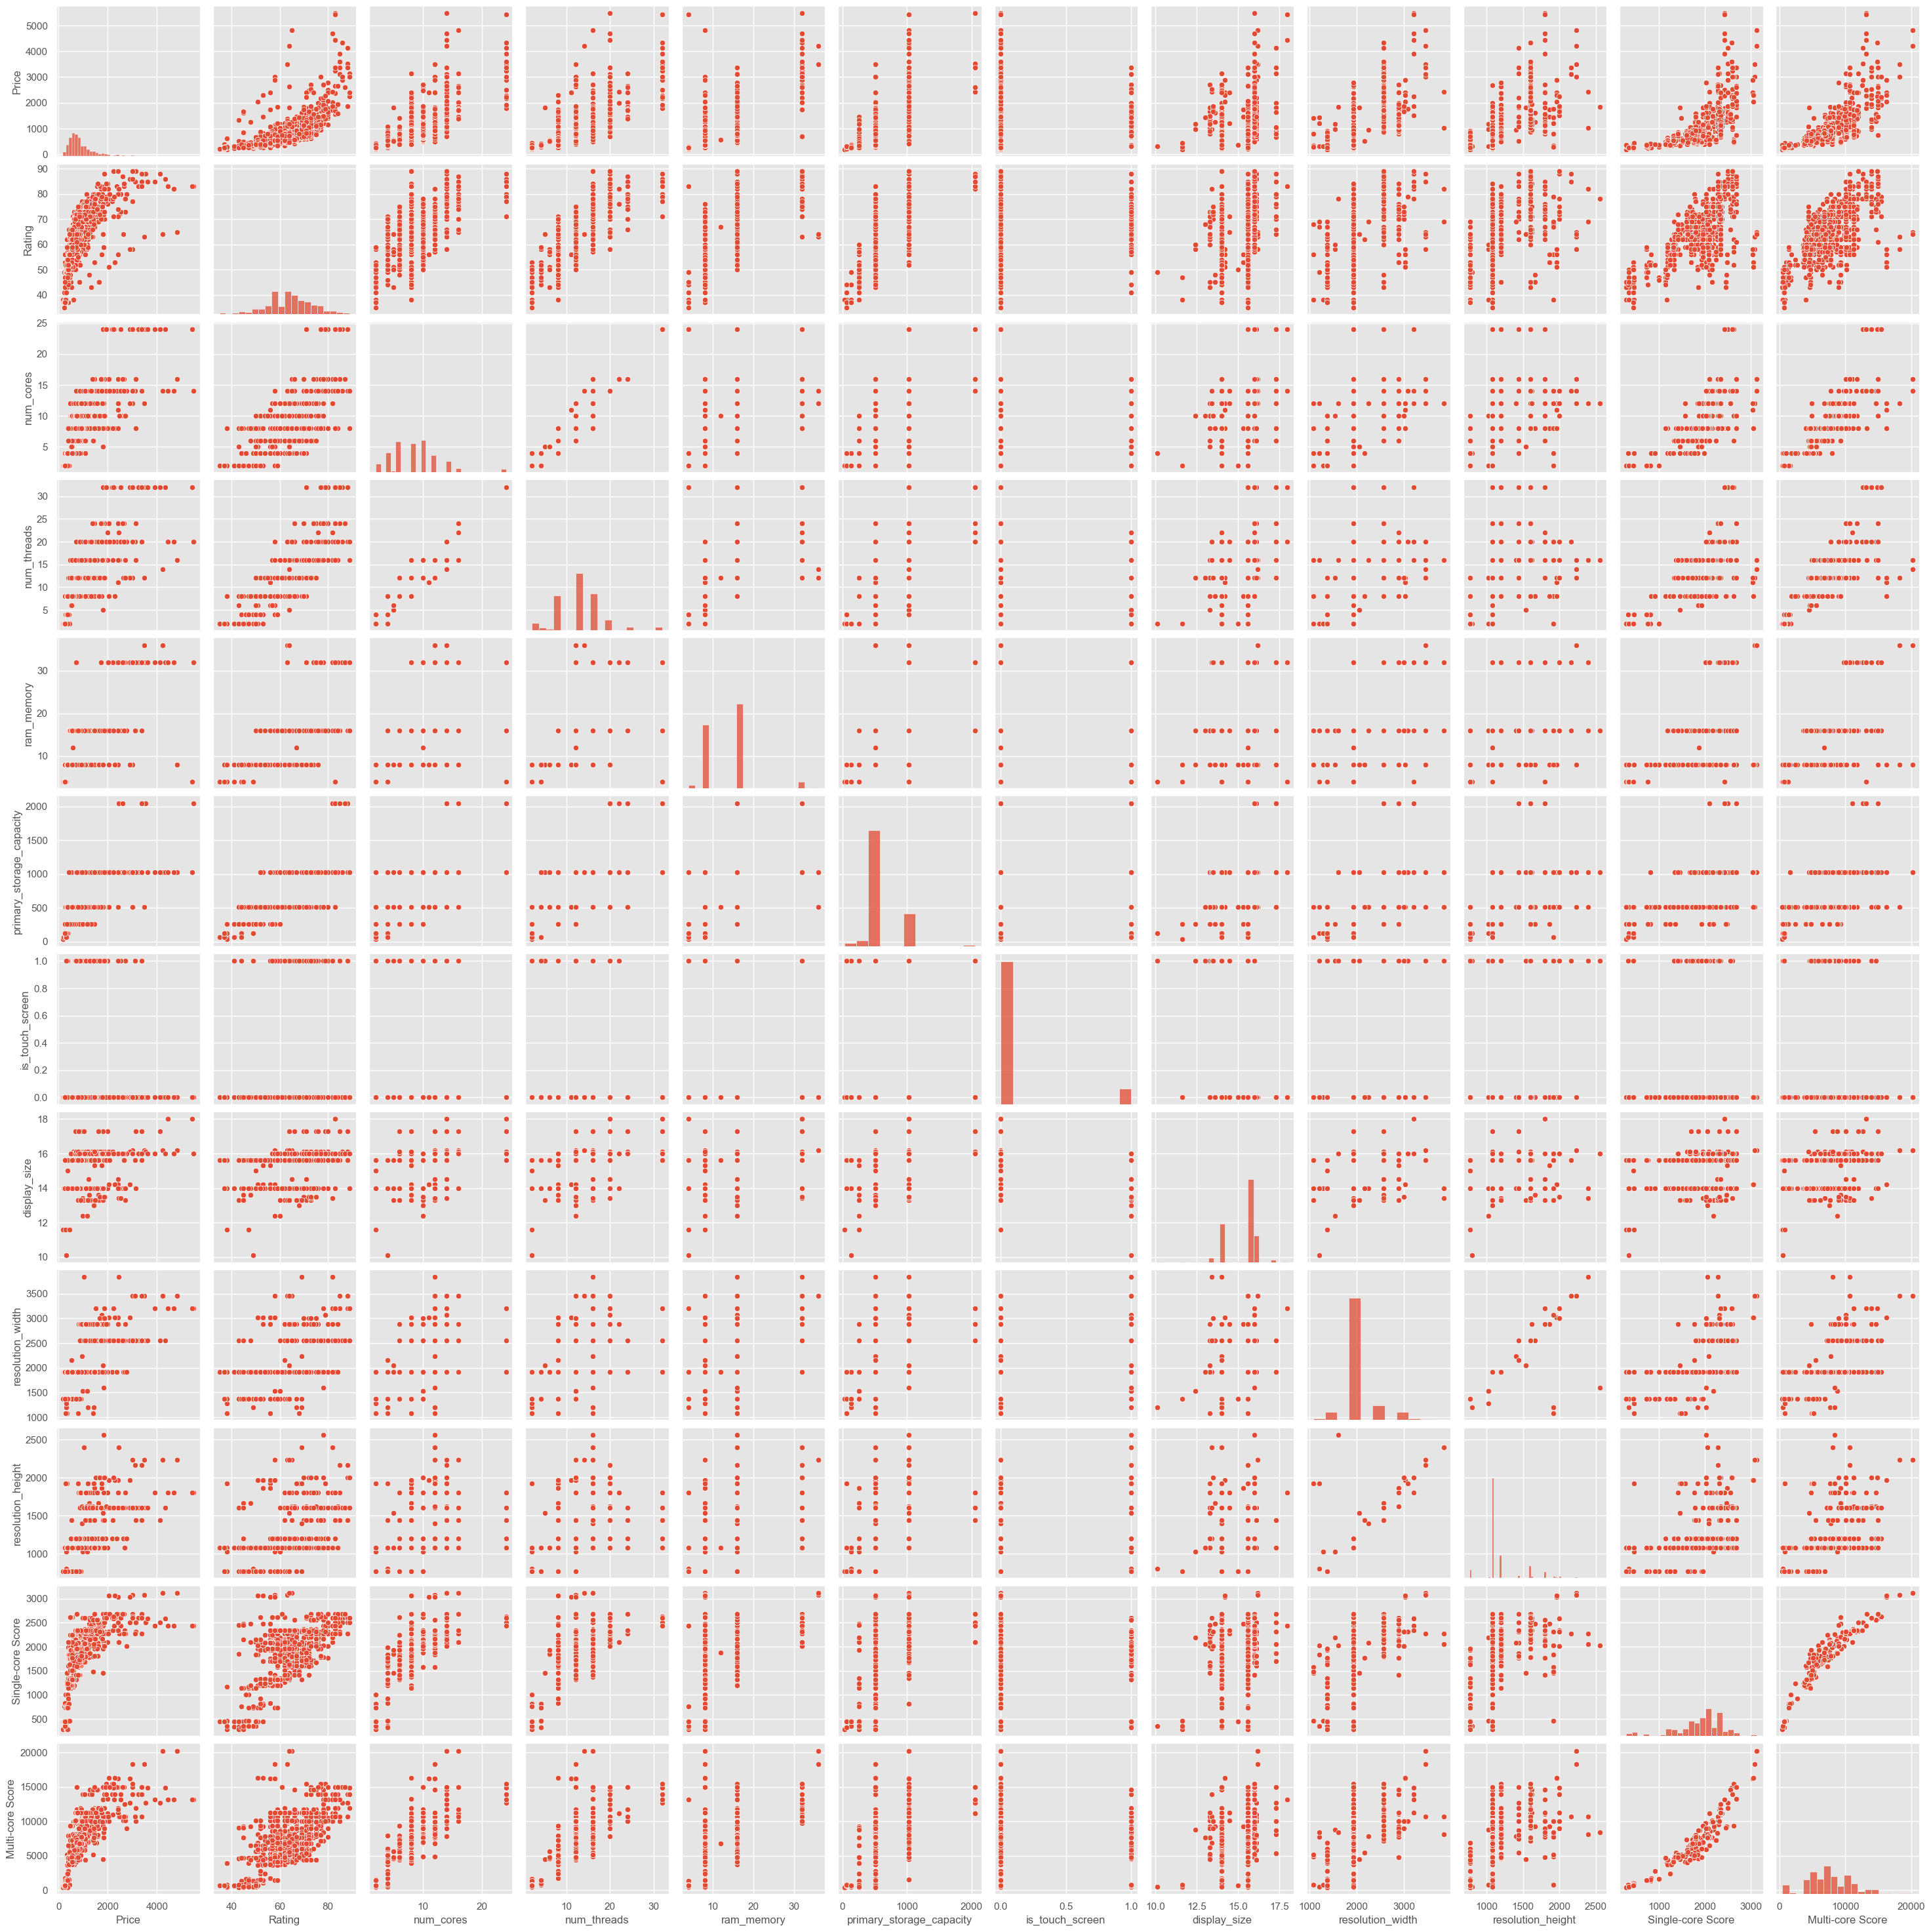

In [25]:
sns.pairplot(data = df);

This plot further confirms our previous observations.

### Interesting Finds
Now lets plot some interesting findings. The next chart shows the normalized means of each brand. This helps us see the overall characteristics of each brand.

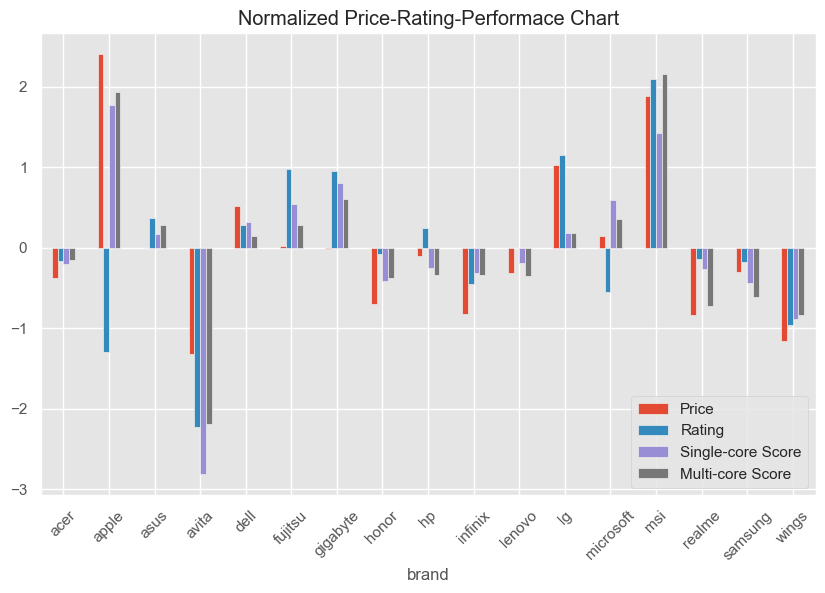

In [26]:
brand_df = df.groupby('brand')[['Price', 'Rating', 'Single-core Score', 'Multi-core Score']].mean()
brand_df=(brand_df-brand_df.mean())/brand_df.std()      #Apply mean normalization
brand_df.plot.bar()
plt.xticks(rotation=45);
plt.title('Normalized Price-Rating-Performace Chart');

A good way to break down this chart is to picture `0` as the mean of each category. If a bar drops below the mean, that means it is usually below average on that category, similarly if the mean is above the average, then the above average. Also, each bar is divided by the standard deviation of the category. So this mean the the distance the bar travels reflects how far off the data is from the standard deviation.

Taking a look at this chart one can pull a great deal of analysis about each brand in each category. For simplicity, `Single-core Score` and `Multi-core Score` will reflect performance, the `Rating` will reflect the popularity of the product, and the `Price` is simply the average price of the brand. The performance information was retrieved from [Geekbench.com](https://www.geekbench.com/), while the popularity and price were retrieved from the kaggle dataset. 

One thing to note are the unusuals. For instance take Apple, whose laptops are some of the most expensive in our data set, have one of the least ratings, while its performace is above most. And take Avita laptops. Similarly, Microsoft has similar characteristics at a smaller scale. Then take a look at Avita, they have some of the worst laptops. In general though, it seems as though if the laptop price is above the average, so is performance and in most cases the rating of the product.

Next graph compares how the specs of each brand's laptops compare to the performance scores.


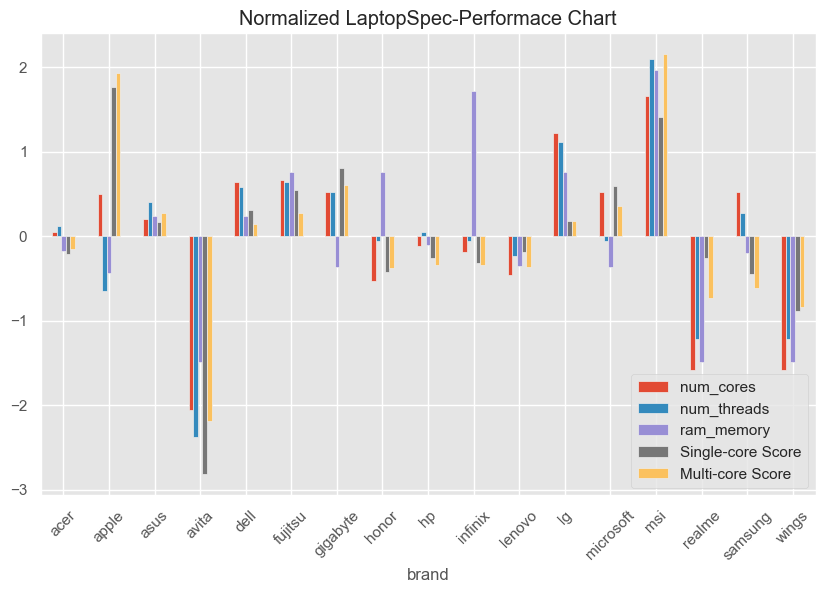

In [27]:
spec_df = df.groupby('brand')[['num_cores', 'num_threads', 'ram_memory', 'Single-core Score', 'Multi-core Score']].mean()
spec_df=(spec_df-spec_df.mean())/spec_df.std()      #Apply mean normalization
spec_df.plot.bar()
plt.xticks(rotation=45);
plt.title('Normalized LaptopSpec-Performace Chart');

The graph is produced the same way as above, just includes different parameters. This chart is interesting because one would expect that as the number of cores and threads increase, so would the performace scores. In some cases, this is the opposite. For example, the samsung laptops have above average cores and threads, but below average performace. Similarly, there are some laptops with a lot of ram, but with very low performance too. Apple laptops seem to have less ram and threads, but perform better than most.

## Analysis Methodology
How are you planning to analyze your data?

Analysis of the data will be done through various regression techniques to examine each individual catagory of data. Then the possibility of prediction models lay at hand, possibly using Random Forest for classification, or Deep learning to predict performance based on Price, CPU speed, ram, integrated/dedicated GPU, etc. 

I plan to perform regression on the data set, targeting the single-core score and multi-core score. Then I plan to test all machine learning algorithms we have learned this semester that have to do with regression. I also still need to normalize all the data before I perform regression or ML algorithms.


### Simple Linear Regression OLS
First, we will test the dataset on simple regression techniques. The goal is to predict the performance of the laptops.

Lets filter out all the Non-numeric data, except for brand, which we will store in a seperate array:

Note: the data is also normalized at this point.

In [28]:
df.columns

Index(['brand', 'Model', 'Price', 'Rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity',
       'secondary_storage_type', 'gpu_brand', 'gpu_type', 'is_touch_screen',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'year_of_warranty', 'quarry', 'urls_quarry', 'Single-core Score',
       'Multi-core Score'],
      dtype='object')

In [29]:
df_num = df.drop(columns=['Model', 'processor_brand', 'processor_tier', 'primary_storage_type', 'secondary_storage_type', 'gpu_brand', 'gpu_type', 'is_touch_screen', 'OS', 'quarry', 'urls_quarry', 'year_of_warranty'])
df_num = df_num.rename(columns={'Single-core Score': 'Single_core_Score',
                                'Multi-core Score': 'Multi_core_Score'})
df_num['year_of_warranty'] = pd.to_numeric(df['year_of_warranty'], errors='coerce')
df_num = df_num.dropna()
df_name = df_num['brand']
df_num = df_num.drop(columns=['brand'])

df_num=(df_num-df_num.mean())/df_num.std()      # apply mean normalization
df_num.head()

Price    Rating  num_cores  num_threads  ram_memory  \
2 -0.513512  0.883654  -0.629173    -0.132159   -0.928533   
3 -0.703412 -0.227145   0.820353     0.604558   -0.928533   
4 -0.898439 -0.227145  -1.112348    -0.868877   -0.928533   
5 -0.173539 -1.943834  -0.145998    -0.868877   -0.928533   
6 -0.788875 -0.833035  -1.112348    -0.868877    0.479041   

   primary_storage_capacity  display_size  resolution_width  \
2                 -0.384036      0.428528         -0.277228   
3                 -0.384036     -1.347144         -0.277228   
4                 -0.384036      0.428528         -0.277228   
5                 -1.389792     -2.124001          1.412379   
6                 -0.384036      0.428528         -0.277228   

   resolution_height  Single_core_Score  Multi_core_Score  year_of_warranty  
2          -0.419293          -0.546722         -0.519850         -0.187549  
3          -0.419293          -0.030718         -0.231437         -0.187549  
4          -0.419293          -1.211724         -1.136976         -0.187549  
5           1.479623           0.508570          0.009393         -0.187549  
6          -0.419293          -0.267071         -0.857498         -0.187549

In [152]:
df_name.describe()

count     786
unique     17
top        hp
freq      190
Name: brand, dtype: object

Now we can apply our first regression with just the numerical values. We will be trying to predict `Single-core Score` and `Multi-core Score`. First, seperately we will use OLS to predict them.

In [153]:
sldp_lstp_ols = sm.ols(formula="Single_core_Score~ year_of_warranty+resolution_height+resolution_width+display_size+primary_storage_capacity+ram_memory+num_threads+num_cores+Rating+Price", data=df_num).fit()
print(sldp_lstp_ols.summary())

                            OLS Regression Results                            
Dep. Variable:      Single_core_Score   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     110.9
Date:                Fri, 03 May 2024   Prob (F-statistic):          3.72e-142
Time:                        12:04:24   Log-Likelihood:                -765.67
No. Observations:                 786   AIC:                             1553.
Df Residuals:                     775   BIC:                             1605.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [154]:
sldp_lstp_ols = sm.ols(formula="Multi_core_Score~ year_of_warranty+resolution_height+resolution_width+display_size+primary_storage_capacity+ram_memory+num_threads+num_cores+Rating+Price", data=df_num).fit()
print(sldp_lstp_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       Multi_core_Score   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     204.1
Date:                Fri, 03 May 2024   Prob (F-statistic):          2.10e-209
Time:                        12:04:24   Log-Likelihood:                -607.79
No. Observations:                 786   AIC:                             1238.
Df Residuals:                     775   BIC:                             1289.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Not terrible! These predictions match up with what we know about those laptops. For instance, the single-core predictions are worse, because we really don't know much about the individual cores themselves. But the multi-core scores have better predictions because, in general, laptops with more cores tend to score higher becuase the load on the cpu is decreased when cores are added.

Next lets see how well a decision tree will work on classifying this dataset:
### Decision Tree Classifying

First, let's borrow some code from the `15-Classification-1-Decision-Trees.ipynb` file for this class. This function renders decision trees.

In [31]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=df_num.columns,  #Edited these lines to help render the correct tree
                                 class_names=df_name,           #Same here
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

For the decision tree, we will attempt to predict the brand based on all the numeric columns.

Accuracy on training data =  0.7402376910016978
Accuracy on test data =  0.7258883248730964


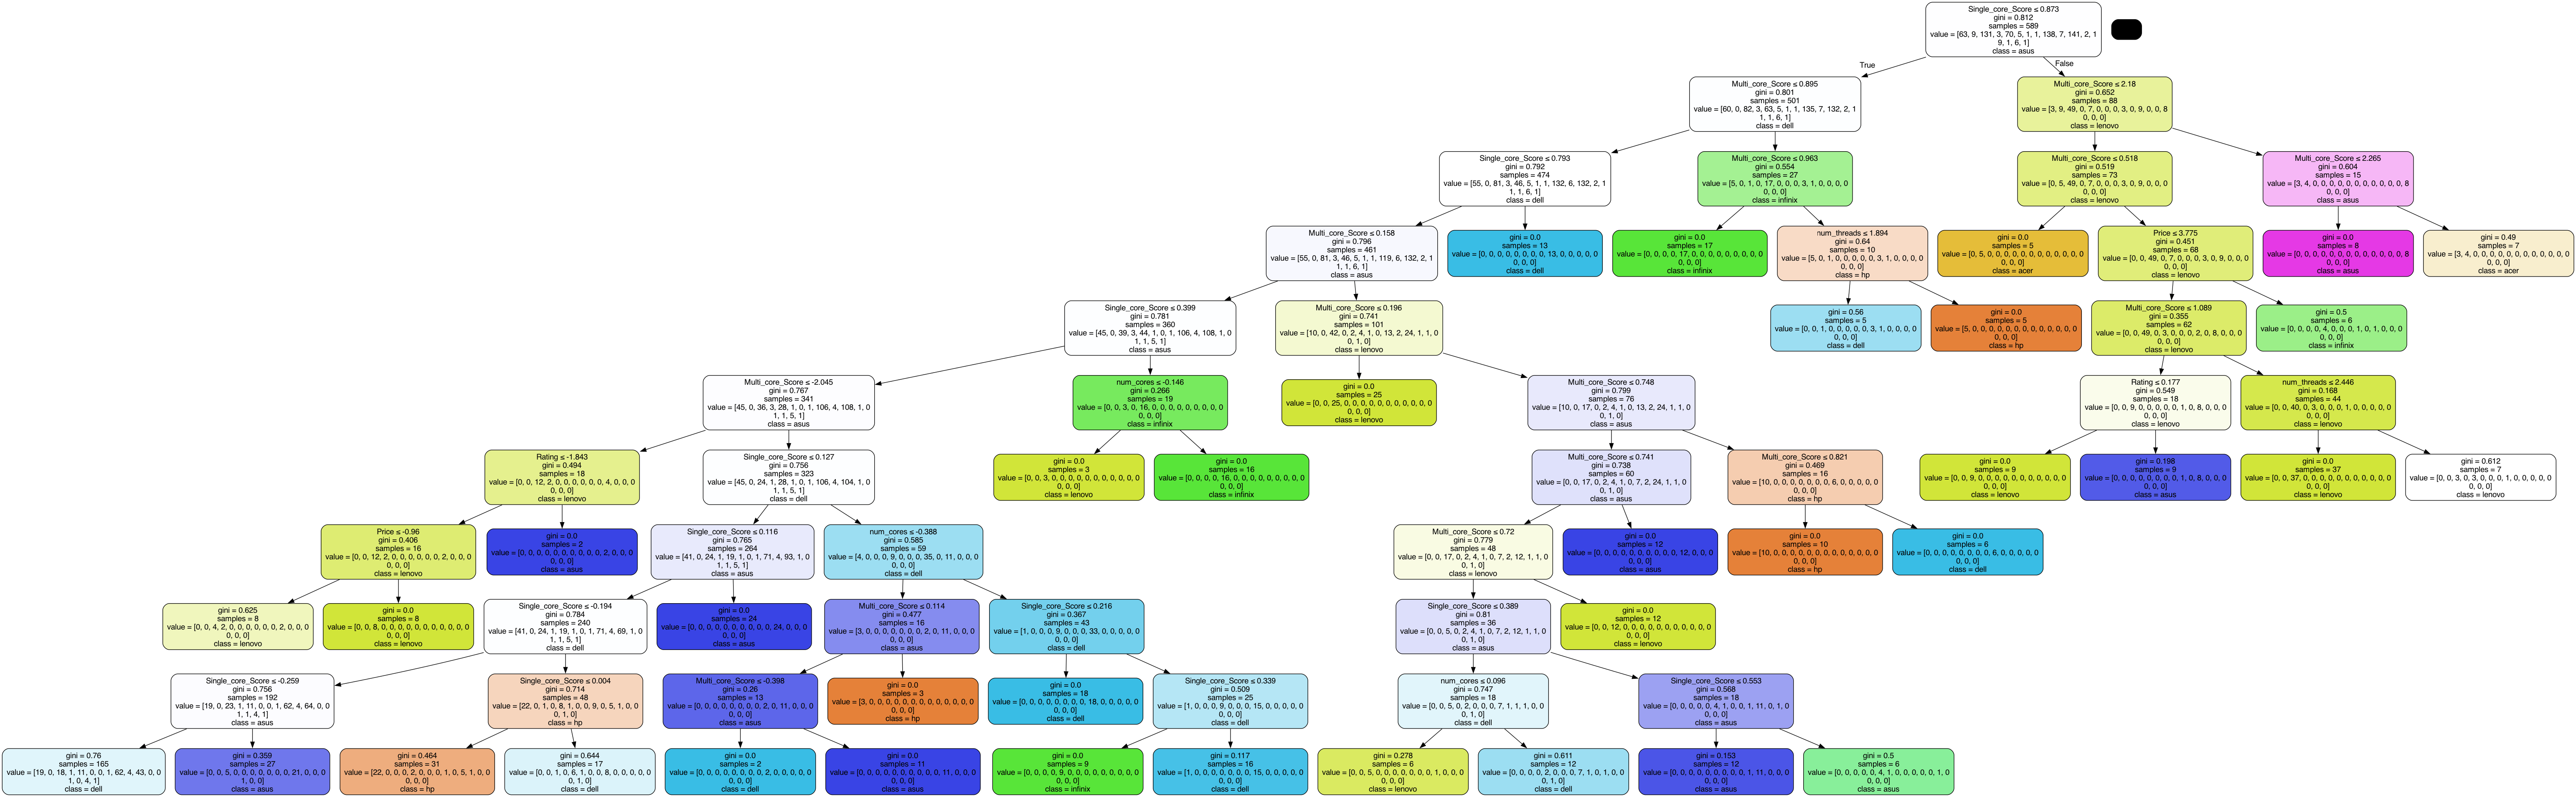

In [32]:
X = df_num.to_numpy()
y = df_name

XTrain, XTest, yTrain, yTest = train_test_split(df_num, df_name, test_size=0.25, random_state=15)

decisionTree = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=10)
decisionTree = decisionTree.fit(XTrain, yTrain)
y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
y_pred = decisionTree.predict(XTest)
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

renderTree(decisionTree, ["brand"])

This decision tree did not do too bad on predicting the brand of the laptop in question. 

Lets try to optimize the parameters real quick:

In [176]:
depth = np.arange(1, 41, 1)
splits = np.arange(2, 21, 1)
scores = {}

for d in depth:
    for s in splits:
        decisionTree = tree.DecisionTreeClassifier(max_depth=d, min_samples_split=s)
        decisionTree = decisionTree.fit(XTrain, yTrain)
        y_pred_train = decisionTree.predict(XTrain)
        y_pred = decisionTree.predict(XTest)
        
        # print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
        # print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
        scores[metrics.accuracy_score(y_true = yTest, y_pred = y_pred)] = {
            'train_score':metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train),
            'depth':d,
            'splits':s
        }

best_test_score = max(list(scores.keys()))
best_params = scores[best_test_score]
best_params['test_score'] = best_test_score
print(f"The best test data score was: {best_test_score} and the params are\n{best_params}")

The best test data score was: 0.9238578680203046 and the params are
{'train_score': 0.9898132427843803, 'depth': 36, 'splits': 3, 'test_score': 0.9238578680203046}


Nice! We can achieve 92% accuracy on predicting the brand of the laptop with these parameters. Let's view the tree:

Accuracy on training data =  0.9898132427843803
Accuracy on test data =  0.8883248730964467


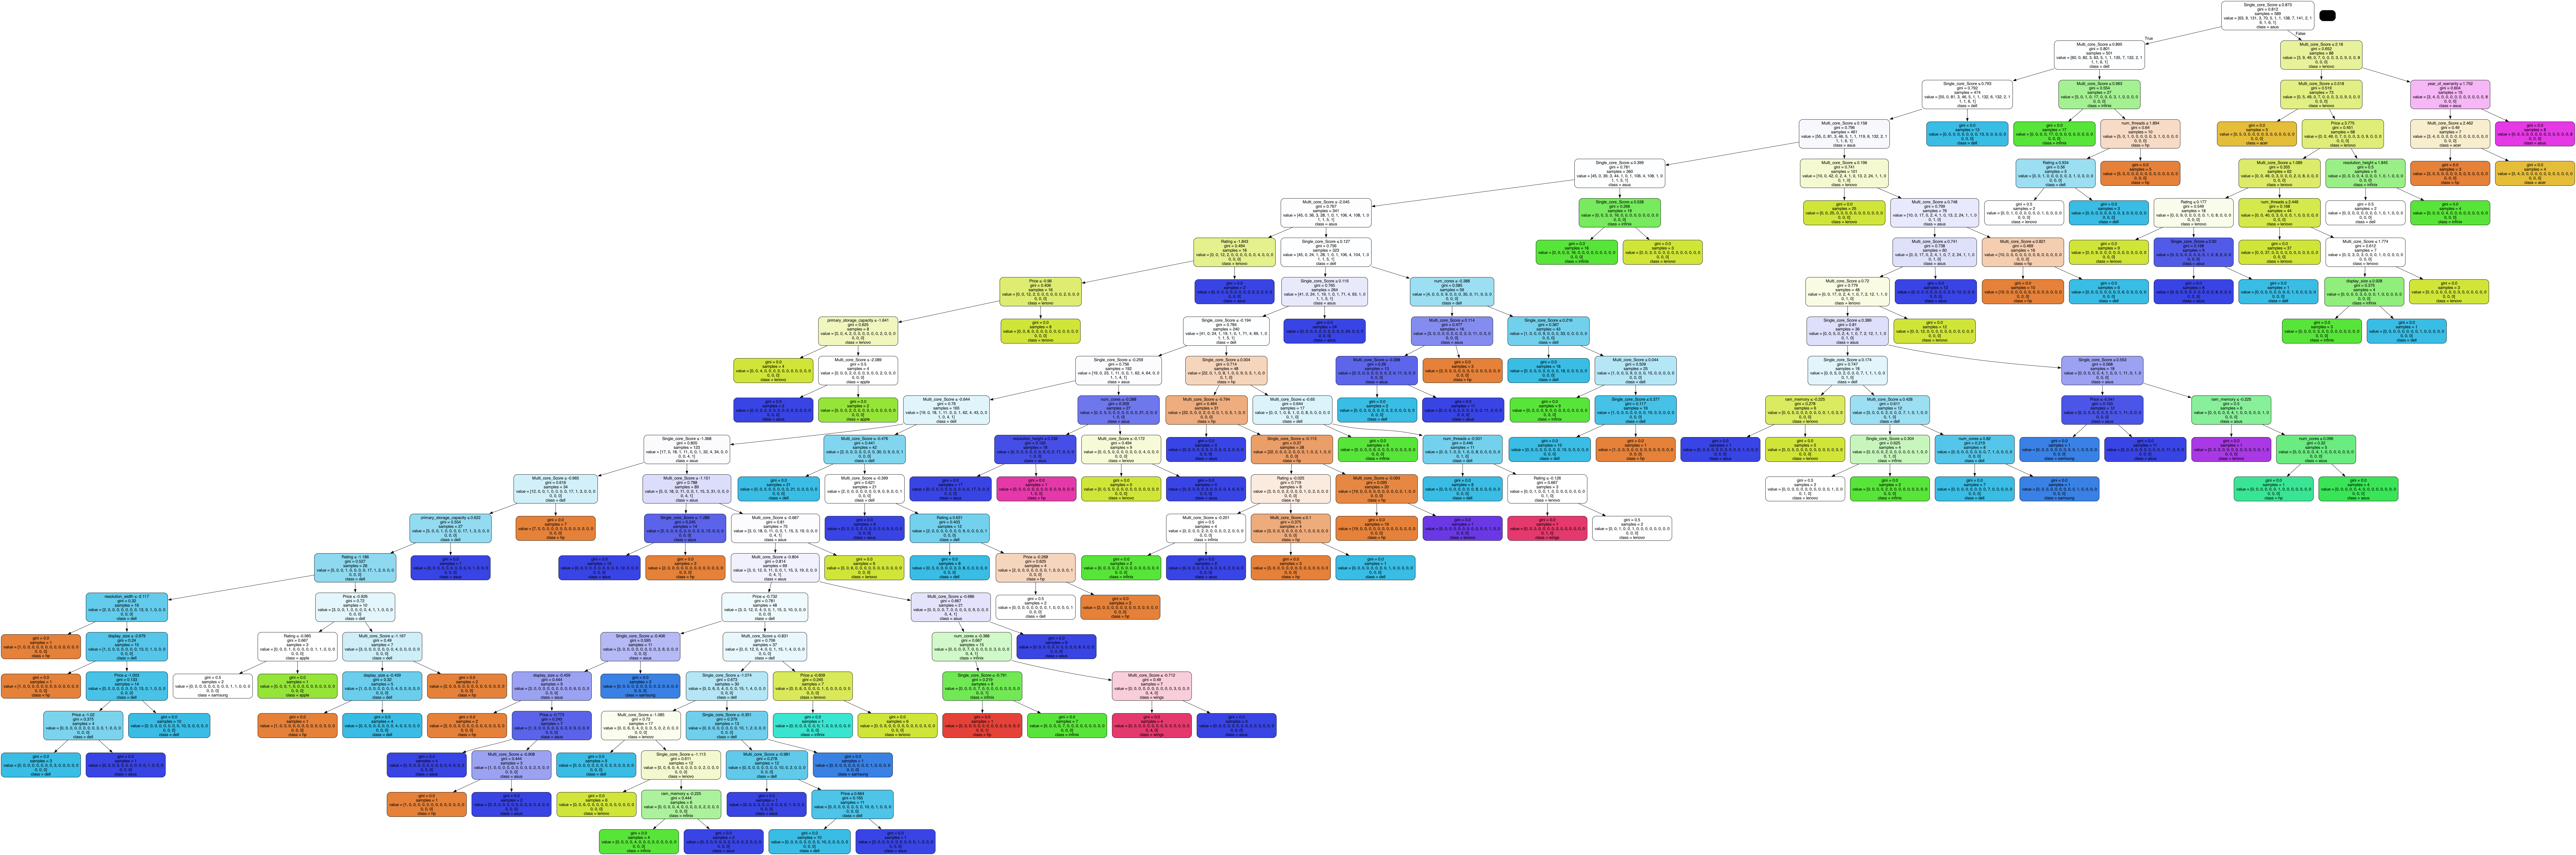

In [193]:
decisionTree = tree.DecisionTreeClassifier(max_depth=36, min_samples_split=3)
decisionTree = decisionTree.fit(XTrain, yTrain)
y_pred_train = decisionTree.predict(XTrain)
y_pred = decisionTree.predict(XTest)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, ["brand"])

Nice! Crazy graph predicting all those brands.

Lets see how it does with a random forest...

### Random Forest Classifier

In [194]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=1000, random_state=15, max_depth=10, min_samples_split=10)

trained_forest = forest.fit(XTrain, yTrain)

y_pred_train = trained_forest.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = trained_forest.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data=  0.8743633276740238
Accuracy on test data=  0.7817258883248731


Let's do a similar experiment to determine the best parameters.

In [200]:
# Warning this code block takes 9+ minutes to complete
depth = np.arange(2, 46, 4)
splits = np.arange(2, 26, 4)
estimators = np.arange(500, 1600, 100)
scores = {}

for e in estimators:
    for d in depth:
        for s in splits:
            forest =  RandomForestClassifier(bootstrap=True, n_estimators=e, random_state=15, max_depth=d, min_samples_split=s)
            trained_forest = forest.fit(XTrain, yTrain)
            y_pred_train = trained_forest.predict(XTrain)
            y_pred = trained_forest.predict(XTest)
            
            scores[metrics.accuracy_score(y_true = yTest, y_pred = y_pred)] = {
                'train_score':metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train),
                'depth':d,
                'splits':s,
                'estimators':e
            }

best_test_score = max(list(scores.keys()))
best_params = scores[best_test_score]
best_params['test_score'] = best_test_score
print(f"The best test data score was: {best_test_score} and the params are:\n{best_params}")

The best test data score was: 0.8984771573604061 and the params are:
{'train_score': 1.0, 'depth': 42, 'splits': 2, 'estimators': 1000, 'test_score': 0.8984771573604061}


Very interesting! Though this simulation took 9 minutes and 18 seconds to run so watch out!

One last classifier to run. Let's do some clustering and see how this data performs.

### Clustering 

To use this clustering method, the categories must be numbers. So this next block prepares an array of a numbered list.

In [47]:
# print(set(df_name))
print(len(set(df_name)))
labels = {}
for i, name in enumerate(set(df_name)):
    labels[name] = i
print(labels)


df_labels = [labels[name] for name in df_name]
print(df_labels)

17
{'gigabyte': 0, 'lg': 1, 'dell': 2, 'avita': 3, 'acer': 4, 'msi': 5, 'apple': 6, 'realme': 7, 'hp': 8, 'microsoft': 9, 'asus': 10, 'samsung': 11, 'honor': 12, 'infinix': 13, 'fujitsu': 14, 'lenovo': 15, 'wings': 16}
[8, 4, 15, 6, 13, 10, 8, 13, 2, 11, 10, 15, 15, 10, 8, 16, 8, 15, 6, 10, 4, 8, 8, 11, 11, 15, 10, 6, 2, 4, 4, 8, 10, 8, 8, 8, 8, 2, 10, 2, 4, 8, 8, 8, 8, 10, 2, 10, 15, 2, 10, 10, 8, 8, 6, 13, 8, 2, 4, 8, 8, 10, 10, 2, 15, 15, 8, 15, 8, 15, 10, 10, 15, 15, 10, 13, 10, 8, 15, 8, 8, 10, 15, 4, 4, 13, 4, 10, 4, 10, 8, 10, 4, 4, 8, 8, 15, 4, 15, 2, 10, 15, 10, 4, 6, 10, 8, 8, 15, 15, 2, 8, 6, 6, 6, 6, 15, 2, 8, 8, 2, 4, 10, 15, 8, 8, 8, 15, 10, 8, 4, 8, 0, 10, 10, 15, 8, 4, 10, 8, 15, 8, 8, 15, 15, 15, 15, 8, 10, 10, 8, 2, 8, 13, 2, 10, 10, 10, 10, 8, 15, 6, 4, 2, 8, 10, 10, 4, 4, 10, 10, 10, 10, 10, 8, 8, 10, 10, 8, 4, 8, 10, 10, 10, 10, 12, 15, 15, 8, 2, 4, 8, 4, 10, 11, 11, 8, 8, 8, 8, 8, 8, 2, 10, 15, 8, 8, 15, 6, 6, 8, 11, 8, 3, 15, 2, 8, 15, 15, 8, 8, 15, 15, 15, 15, 1

There are 17 brands to predict.

Estimated number of clusters: 16
Estimated number of noise points: 235
Homogeneity: 0.099
Completeness: 0.114
V-measure: 0.106


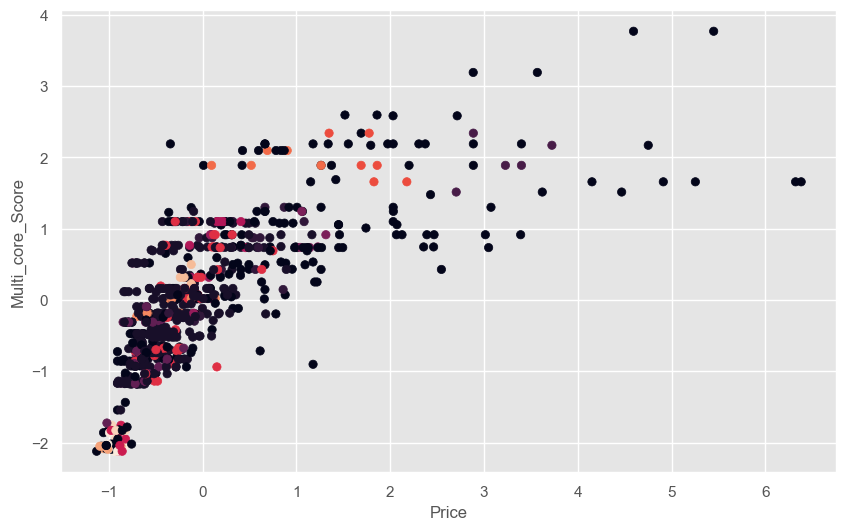

In [66]:
db_model = DBSCAN(eps=1.0, min_samples=5, n_jobs=-1)
db_model.fit(X)
y_pred = db_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 10], c=y_pred,  marker="o");
plt.xlabel(df_num.columns[0]); plt.ylabel(df_num.columns[10])

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df_labels, y_pred))
print("Completeness: %0.3f" % metrics.completeness_score(df_labels, y_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(df_labels, y_pred))


Wow that is not very good at all. If clustering is even possible with DBSCAN then we will need to optimize the algorithm for it to work:

The best test data score was: 0.19334634784084034 and the params are:
{'est_clust': 12, 'noise_pnt': 27, 'Homogeneity': 0.12695952349407755, 'Completeness': 0.40525121939000575, 'eps': 2.5, 'min_samples': 3, 'V_measure': 0.19334634784084034}


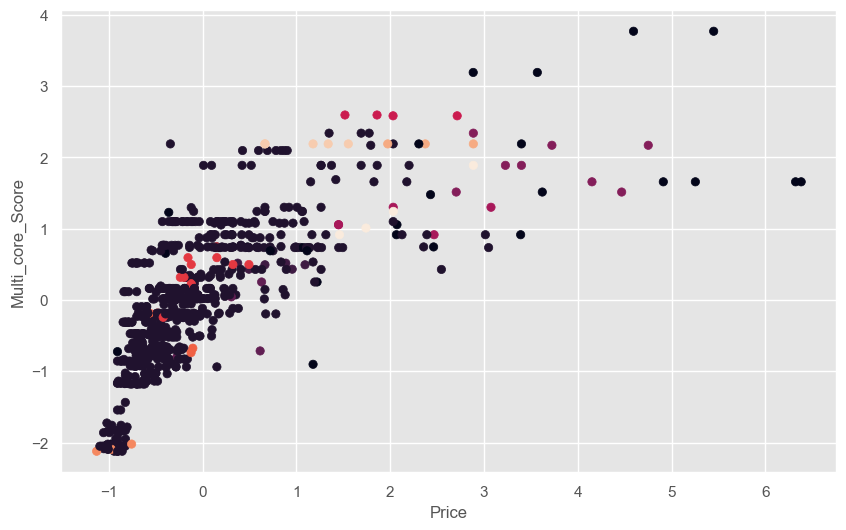

In [72]:
epss = np.arange(0.5, 10.5, 0.5)
min_s = np.arange(3, 40, 1)
scores = {}

for e in epss:
    for m in min_s:
        db_model = DBSCAN(eps=e, min_samples=m, n_jobs=-1)
        db_model.fit(X)
        y_pred = db_model.fit_predict(X)
        labels = db_model.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
        scores[metrics.v_measure_score(df_labels, y_pred)]={
            'est_clust':n_clusters_,
            'noise_pnt':n_noise_,
            'Homogeneity':metrics.homogeneity_score(df_labels, y_pred),
            'Completeness':metrics.completeness_score(df_labels, y_pred),
            'eps':e,
            'min_samples':m
        }

best_v_score = max(list(scores.keys()))
best_params = scores[best_v_score]
best_params['V_measure'] = best_v_score
print(f"The best test data score was: {best_v_score} and the params are:\n{best_params}")

db_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'], n_jobs=-1)
db_model.fit(X)
y_pred = db_model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 10], c=y_pred,  marker="o");
plt.xlabel(df_num.columns[0]); plt.ylabel(df_num.columns[10]);

From these results it seems as though clustering is not good at this application. It's possible another algorithm would be able to predict this better.

The last predictor to run will be the neural networks.

### Artificial Neural Networks

We will use the multi-layer perceptron library provided by sklearn.

First, a classifier to predict the brand, then the regressor to predict the performace.

#### MLP Classifier

In [116]:
X = df_num.to_numpy()
y = df_name

labels = {}
for i, name in enumerate(set(df_name)):
    labels[name] = i
df_labels = [labels[name] for name in df_name]


XTrain, XTest, yTrain, yTest = train_test_split(X, df_labels, test_size=0.10, random_state=14)
print(set(yTrain))
print(set(yTest))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
{0, 1, 2, 4, 6, 8, 10, 11, 13, 15}


In [117]:
mlp = MLPClassifier(hidden_layer_sizes=(26, 52, 104, 68, 34), max_iter=1000, alpha=1e-3,
                     solver='adam', verbose=10, tol=1e-5, random_state=15)
mlp.fit(XTrain, yTrain)

print("Training set score: %f" % mlp.score(XTrain, yTrain))
print("Test set score: %f" % mlp.score(XTest, yTest))

y_pred = mlp.predict(XTest)
print(metrics.confusion_matrix(yTest,y_pred))

Iteration 1, loss = 2.83635392
Iteration 2, loss = 2.71181533
Iteration 3, loss = 2.62049303
Iteration 4, loss = 2.52610749
Iteration 5, loss = 2.41939979
Iteration 6, loss = 2.29508252
Iteration 7, loss = 2.16091905
Iteration 8, loss = 2.03488063
Iteration 9, loss = 1.94310464
Iteration 10, loss = 1.87026443
Iteration 11, loss = 1.80548148
Iteration 12, loss = 1.75517436
Iteration 13, loss = 1.70978262
Iteration 14, loss = 1.66655950
Iteration 15, loss = 1.63282321
Iteration 16, loss = 1.59274145
Iteration 17, loss = 1.57027247
Iteration 18, loss = 1.54498294
Iteration 19, loss = 1.51987175
Iteration 20, loss = 1.49997046
Iteration 21, loss = 1.48582068
Iteration 22, loss = 1.46091229
Iteration 23, loss = 1.45068006
Iteration 24, loss = 1.43091026
Iteration 25, loss = 1.41022635
Iteration 26, loss = 1.39825582
Iteration 27, loss = 1.37590250
Iteration 28, loss = 1.36739095
Iteration 29, loss = 1.34981512
Iteration 30, loss = 1.33711822
Iteration 31, loss = 1.32175000
Iteration 32, los

After tweaking the parameters, this was the best the MLP Classifier could get. This is likely due to the size of the data set being slightly small. It seemed no matter how well the data was split, either the Test or the Train data set was short a few classes. 

Lastly we will attempt to use the MLP regressor to predict the performance results of the laptop dataset.

#### MLP Regressor

In [125]:
X = df_num.drop(columns=['Multi_core_Score', 'Single_core_Score'])
y = df_num[['Multi_core_Score', 'Single_core_Score']]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state=15)

In [132]:
# MLP regression with Scikit-Learn
mlp_reg = MLPRegressor(hidden_layer_sizes=(26,52,104,52,26),verbose=10,random_state=15,solver='adam',tol=1e-5, max_iter=500, alpha=1e-3)
print(mlp_reg.get_params())

mlp_reg.fit(XTrain, yTrain)

print(mlp_reg.score(XTest,yTest)) # score = 1 is good

{'activation': 'relu', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (26, 52, 104, 52, 26), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 15, 'shuffle': True, 'solver': 'adam', 'tol': 1e-05, 'validation_fraction': 0.1, 'verbose': 10, 'warm_start': False}
Iteration 1, loss = 0.52360796
Iteration 2, loss = 0.45216342
Iteration 3, loss = 0.39359347
Iteration 4, loss = 0.34291304
Iteration 5, loss = 0.30808823
Iteration 6, loss = 0.27853239
Iteration 7, loss = 0.25598338
Iteration 8, loss = 0.23746565
Iteration 9, loss = 0.22162046
Iteration 10, loss = 0.20654760
Iteration 11, loss = 0.19207934
Iteration 12, loss = 0.17782926
Iteration 13, loss = 0.16484878
Iteration 14, loss = 0.15361076
Iteration 15, loss = 0.14356107
Iteration 16, loss = 0.13276131
Itera

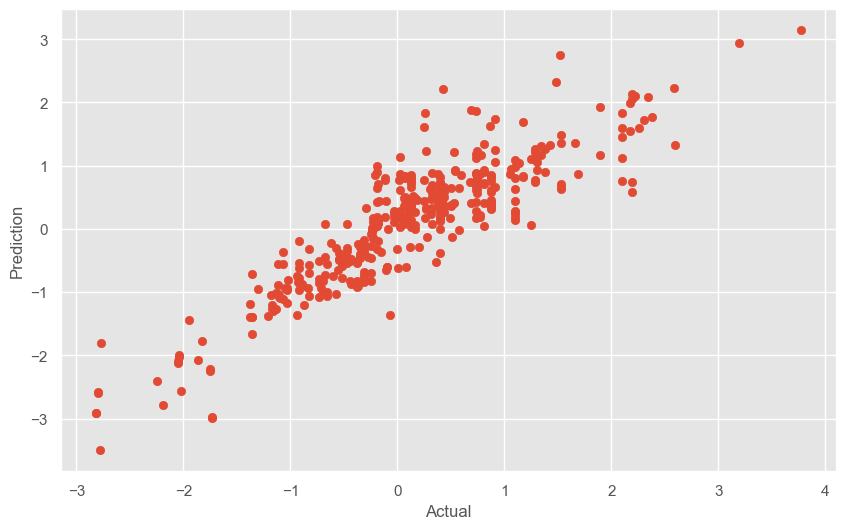

In [139]:
y_results = mlp_reg.predict(XTest)
plt.scatter(x = yTest, y = y_results)
plt.xlabel('Actual'); plt.ylabel('Prediction');

Looking at this graph, these are not bad predictions. The data casn almost form a good line. I think these results tell us if the data was more refined, the models would do a better job of predicting. 
It would be interesting to see if more time could be spent, how feature engineering could come in to play. For instance, the performance data can be further narrowed down by utilizing more parsing functions to validate each point returned by scraping the web. These predictions are purely based on the assumption that those points are valid points for the laptops in particular. There are also multiple data sets on the web of more laptops. If all those data sets were combined, would they yield better results?

# Conclusion

It is apparent that the Laptop Dataset in conjunction with the Geekbench data is no perfect match, otherwise, the models would have performed much better. But the predictions do show that there is missing features and data waiting to be found. With those extra features, these predictions and patterns could make a lot more sense. For example, the processor speed itself should influence the single-core score the most, whilst number of cores would influence multi-core scores. Processor speed could potentially be included but more information would have to be gathered about each individual laptop that is not readily available. Also as noted before, the Geekbench search results don't always narrow down very well the individual laptop processors and cores. But the results include information on the computer itself, like the brand and the processor identity and speeds. But to correlate this with complicated functions would be near impossible because of how inconsistent each brand of laptop is from one another. It would take intelligence to attribute those datasets. Something that could be potentially interesting would be to use a LLM to do this parsing for oneself. It has great potential to speed up slow monotonous work and save workers or scientists hours of this.

# The Video

[VIDEO](https://youtu.be/AqiWdwNYUSc)